https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

https://arxiv.org/abs/1803.10260

Feature extraction is already done, this is only for data visualization

### Import libraries:
import libraries for data processing, ML and visualization

In [31]:
#for data
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import math

#for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#for MLA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#import xgboost as xgb


#for crossvalidation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score

#pca
from sklearn.decomposition import PCA

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

### Get data:

In [2]:
data = pd.read_csv("train.csv")
data.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


### Analyzing:

In [6]:
data.describe(include = 'all')

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [7]:
data["critical_temp"].describe(include = 'all')

count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

34.42121913535249 34.25355694704622


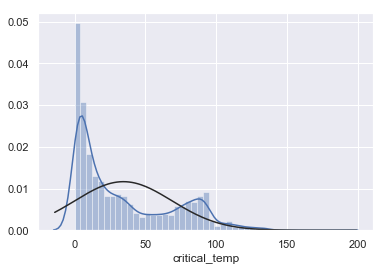

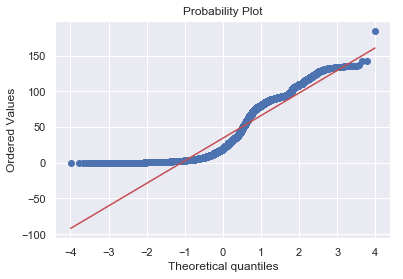

In [8]:
target = "critical_temp"
sns.distplot(data[target], fit=norm)
(mu, sigma) = norm.fit(data[target])
print(mu, sigma)

fig = plt.figure()
res = stats.probplot(data[target], plot=plt)
plt.show()

linear models work best on normal distributions, late us take log to adjust to normal distribution

2.913764340514398 1.2893996540180033


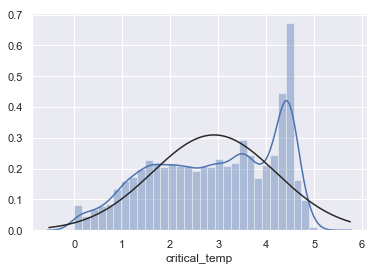

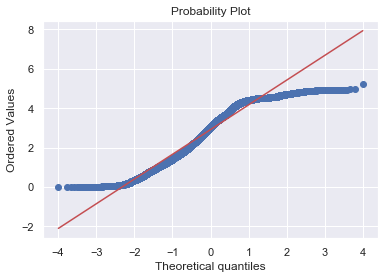

In [9]:
newT = data[target]
newT1 = np.log1p(newT)
sns.distplot(newT1, fit=norm)
(mu, sigma) = norm.fit(newT1)
print(mu, sigma)

fig = plt.figure()
res = stats.probplot(newT1, plot=plt)
plt.show()

In [10]:
find_null = data.isnull().sum()
for i in find_null:
    if i == 1 :
        print("NULL found!!")
find_null = data2.isnull().sum()
for i in find_null:
    if i == 1 :
        print("NULL found!!")

no null found

In [11]:
for i in data.columns:
    print(i)

number_of_elements
mean_atomic_mass
wtd_mean_atomic_mass
gmean_atomic_mass
wtd_gmean_atomic_mass
entropy_atomic_mass
wtd_entropy_atomic_mass
range_atomic_mass
wtd_range_atomic_mass
std_atomic_mass
wtd_std_atomic_mass
mean_fie
wtd_mean_fie
gmean_fie
wtd_gmean_fie
entropy_fie
wtd_entropy_fie
range_fie
wtd_range_fie
std_fie
wtd_std_fie
mean_atomic_radius
wtd_mean_atomic_radius
gmean_atomic_radius
wtd_gmean_atomic_radius
entropy_atomic_radius
wtd_entropy_atomic_radius
range_atomic_radius
wtd_range_atomic_radius
std_atomic_radius
wtd_std_atomic_radius
mean_Density
wtd_mean_Density
gmean_Density
wtd_gmean_Density
entropy_Density
wtd_entropy_Density
range_Density
wtd_range_Density
std_Density
wtd_std_Density
mean_ElectronAffinity
wtd_mean_ElectronAffinity
gmean_ElectronAffinity
wtd_gmean_ElectronAffinity
entropy_ElectronAffinity
wtd_entropy_ElectronAffinity
range_ElectronAffinity
wtd_range_ElectronAffinity
std_ElectronAffinity
wtd_std_ElectronAffinity
mean_FusionHeat
wtd_mean_FusionHeat
gmean

**wtd = weighted, gmean = geometric mean, std = standard deviation.**

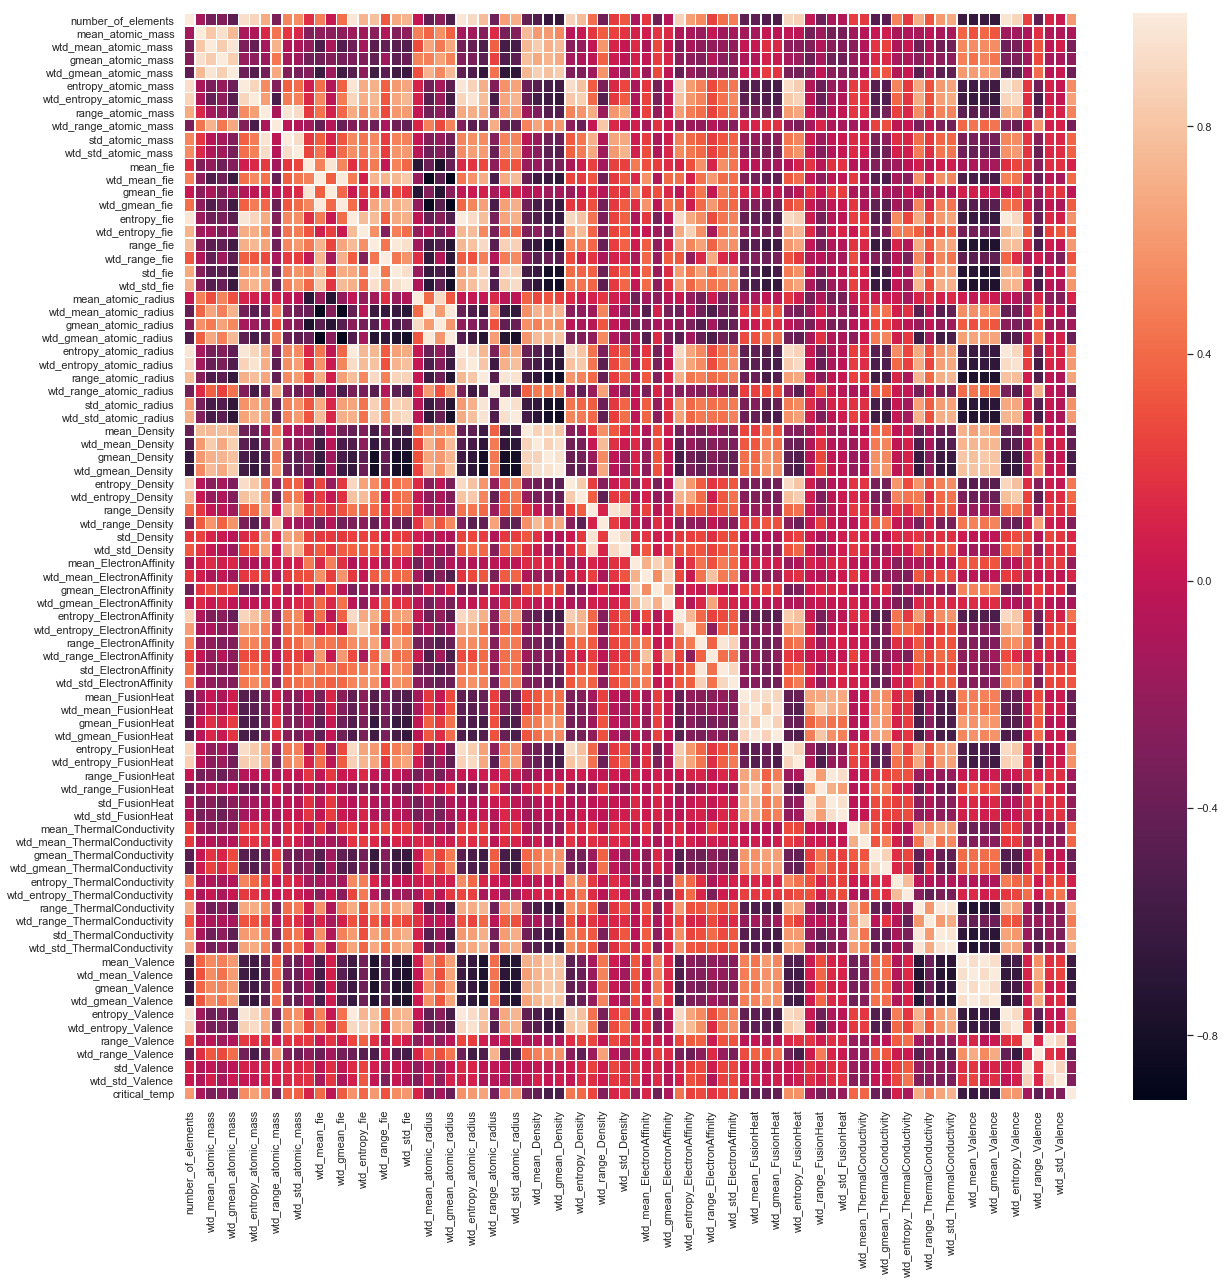

In [12]:
#heatmap 
cormat = data.corr()#correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(cormat, linewidths=.5)

We will now investigate the inter relation between mean_atomic, wtd_mean_atomic, gmean_atomic, wtd_gmean_atomic terms for mass/density/electron affinity/ valence. 

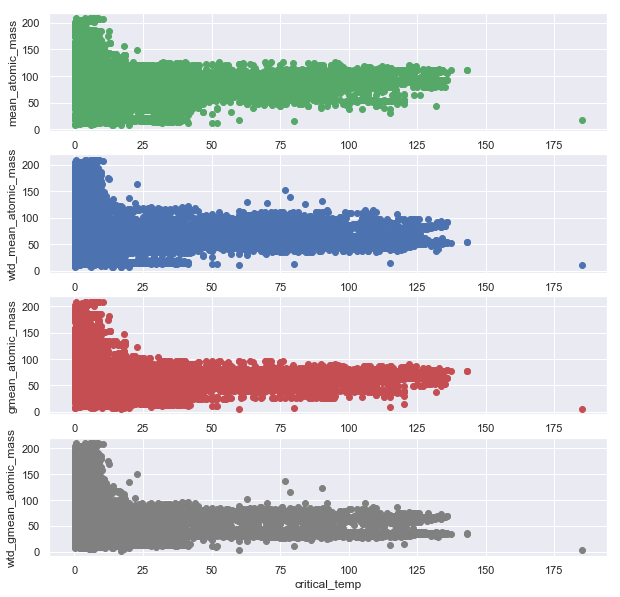

In [13]:
to_plot = ["mean_atomic_mass", "wtd_mean_atomic_mass", "gmean_atomic_mass", "wtd_gmean_atomic_mass"]
color = ["g", "b", "r", "grey"]
f, ax = plt.subplots(4, figsize=(10,10))
for count, p in enumerate(to_plot):
    ax[count].scatter(data[target],data[p], c = color[count])
    ax[count].set_xlabel(target)
    ax[count].set_ylabel(p)

plt.show()

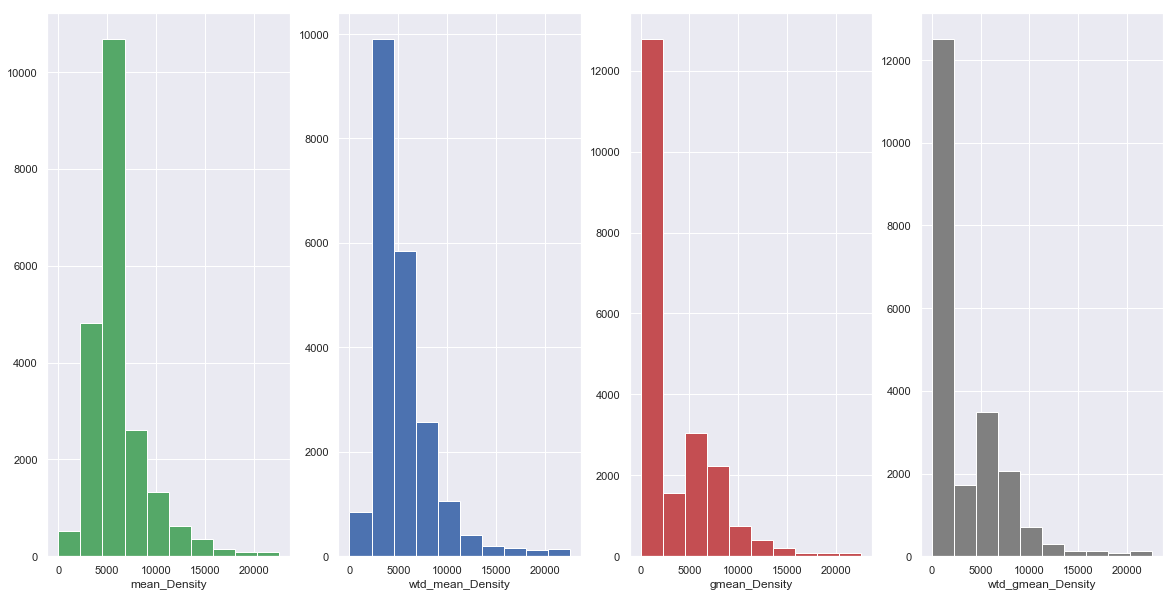

In [14]:
to_plot = ["mean_Density","wtd_mean_Density","gmean_Density","wtd_gmean_Density"]
color = ["g", "b", "r", "grey"]
f, ax = plt.subplots(1,4, figsize=(20,10))
for count, p in enumerate(to_plot):
    ax[count].hist(data[p], color = color[count])
    ax[count].set_xlabel(p)
    
plt.show()

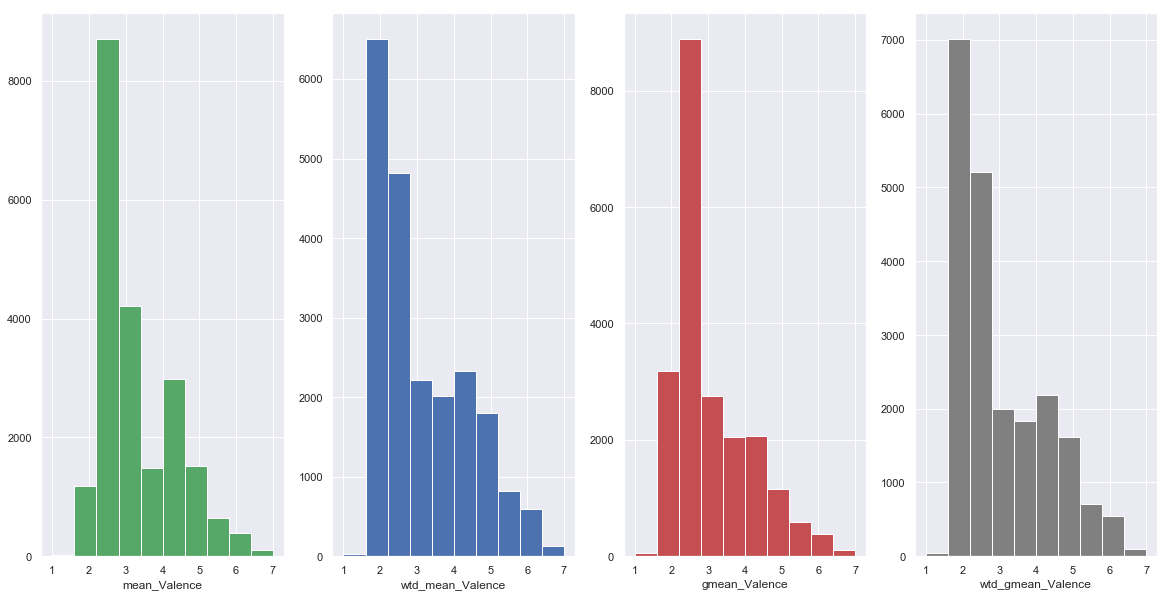

In [15]:
to_plot = ["mean_Valence","wtd_mean_Valence","gmean_Valence","wtd_gmean_Valence"]
color = ["g", "b", "r", "grey"]
f, ax = plt.subplots(1,4, figsize=(20,10))
for count, p in enumerate(to_plot):
    ax[count].hist(data[p], color = color[count])
    ax[count].set_xlabel(p)
    
plt.show()

mean_ThermalConductivity, mean_ElectronAffinity,mean_FusionHeat,mean_fie,Mass, radius and density must have some interrelation .We will investigate their relation by taking "mean" variable

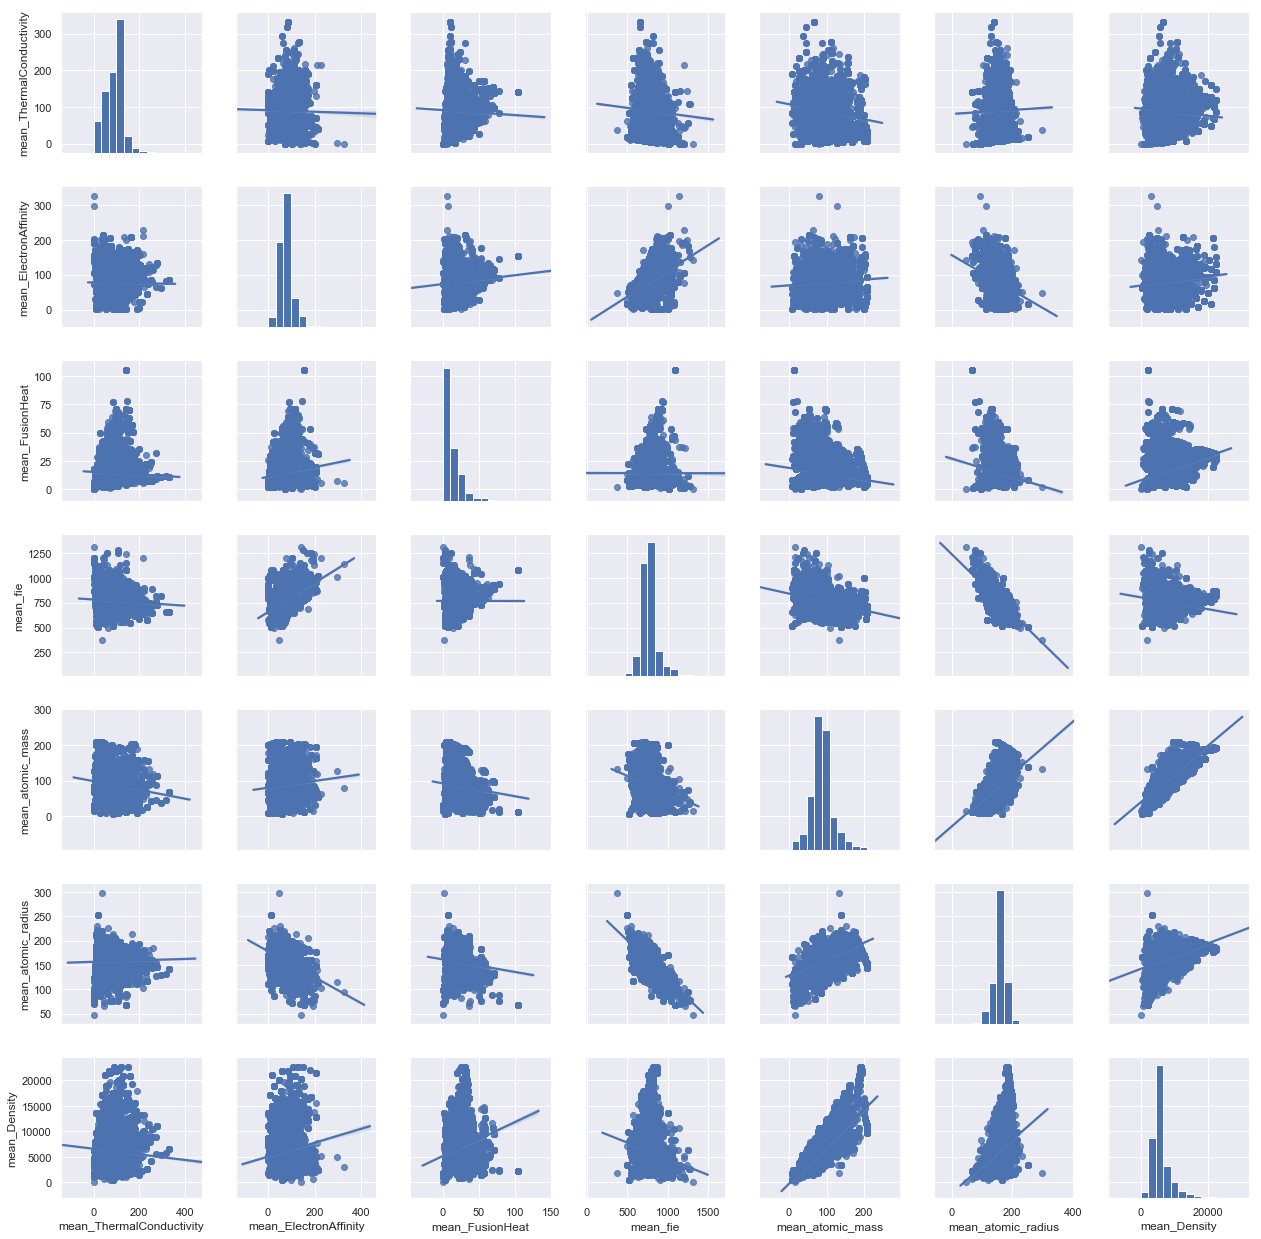

In [37]:
to_plot = ["mean_ThermalConductivity", "mean_ElectronAffinity","mean_FusionHeat","mean_fie","mean_atomic_mass", "mean_atomic_radius", "mean_Density"]
g = sns.pairplot(data[to_plot], kind = "reg")

distribution of "mean_ThermalConductivity","mean_ThermalConductivity", "mean_ElectronAffinity","mean_FusionHeat","mean_fie", "mean_Density", "mean_Valence" with restpect to target variable

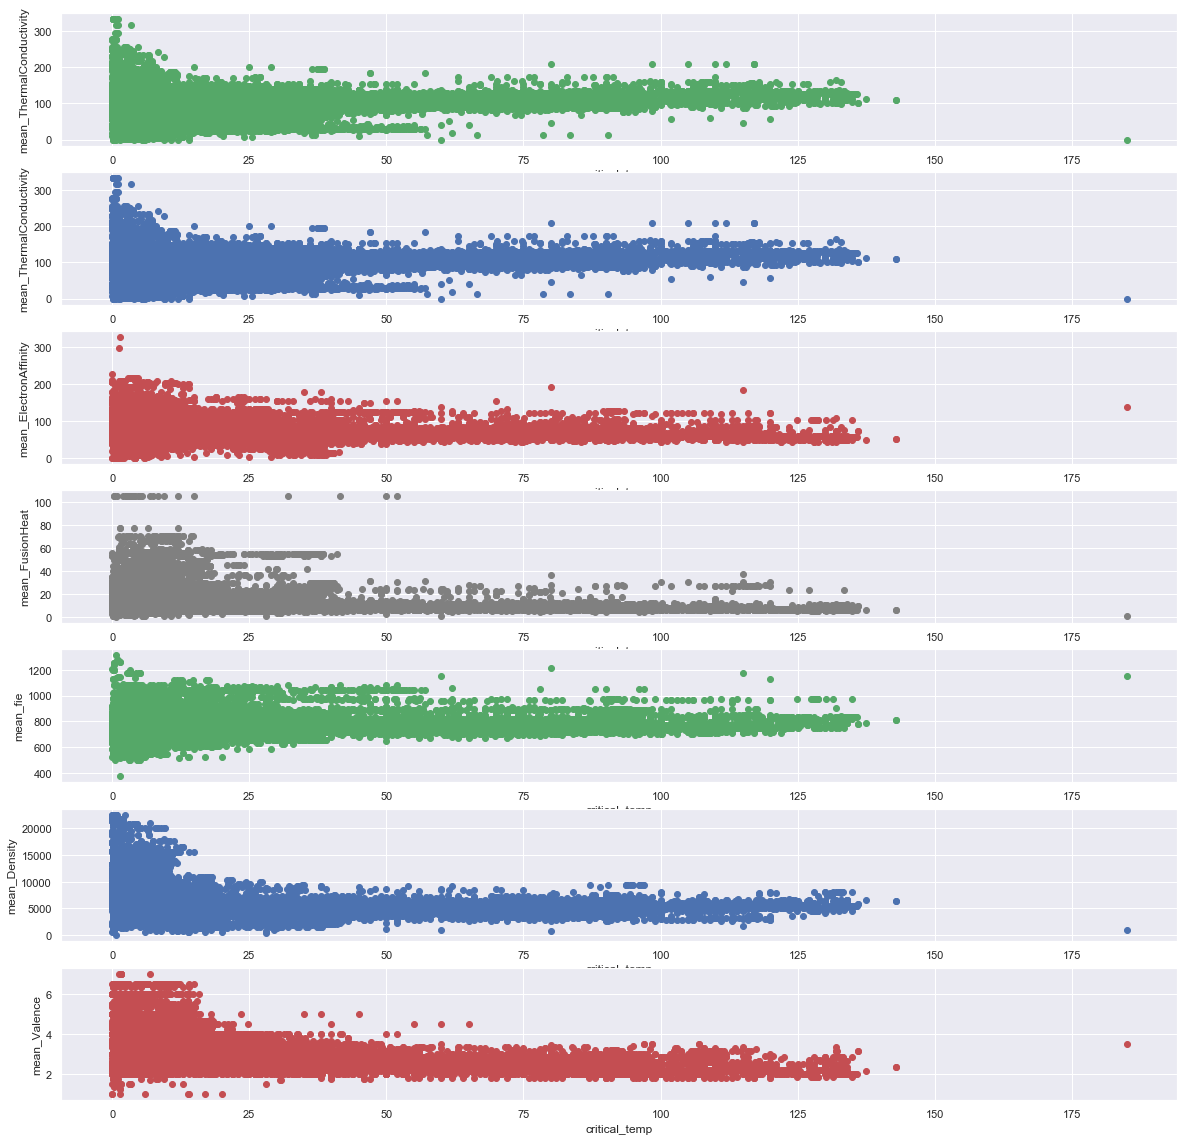

In [17]:
to_plot = ["mean_ThermalConductivity","mean_ThermalConductivity", "mean_ElectronAffinity","mean_FusionHeat","mean_fie", "mean_Density", "mean_Valence"]
color = ["g", "b", "r", "grey"]
f, ax = plt.subplots(len(to_plot), figsize=(20,20))
for count, p in enumerate(to_plot):
    ax[count].scatter(data[target],data[p], c = color[count%4])
    ax[count].set_xlabel(target)
    ax[count].set_ylabel(p)

plt.show()

### Model creation 1:

All positive correlated features has been taken.

In [19]:
#split data
y_data = data[target]
data = data.drop([target], axis = 1)

In [20]:

x_train, x_test, y_train, y_test = train_test_split(data, y_data, test_size = 0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17010, 81)
(4253, 81)
(17010,)
(4253,)


0.7357127294522006


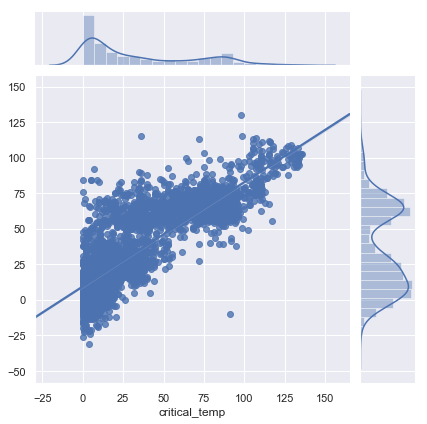

In [23]:
#create model
clfr = LinearRegression()
clfr.fit(x_train, y_train)
y_pred = clfr.predict(x_test)
print(r2_score(y_test, y_pred))
g = sns.jointplot(y_test, y_pred, kind = "reg")

### Model creation 2:

using SVR


0.7669539234000797


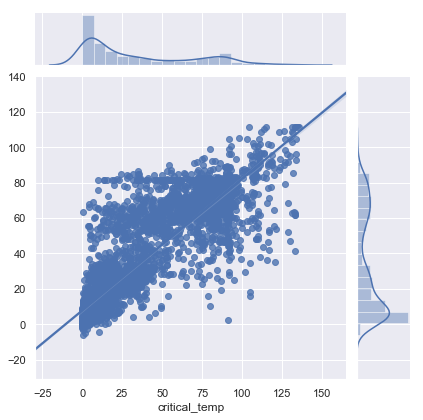

In [35]:
#scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#create model
clfsvr = SVR()
clfsvr.fit(x_train, y_train)
y_pred = clfsvr.predict(x_test)
print(r2_score(y_test, y_pred))
g = sns.jointplot(y_test, y_pred, kind = "reg")

### Model creation 3:

using DesicionTree

0.8475203777697666


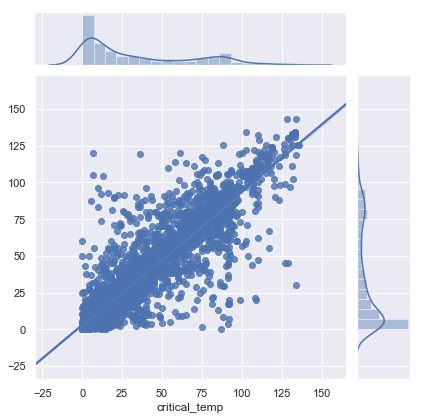

In [30]:
#create model
clftree = DecisionTreeRegressor()
clftree.fit(x_train, y_train)
y_pred = clftree.predict(x_test)
print(r2_score(y_test, y_pred))
g = sns.jointplot(y_test, y_pred, kind = "reg")

### Model creation 4:

using RandomForestRegressor 

0.9151302373162882


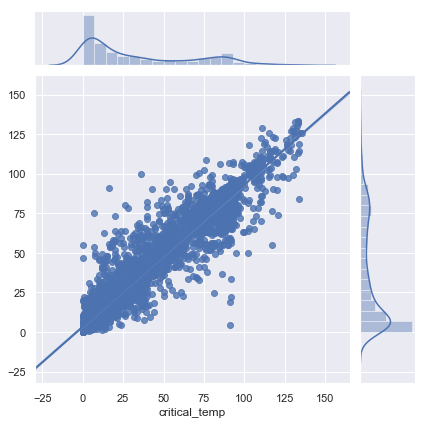

In [26]:
#create model
clffor = RandomForestRegressor(n_estimators = 100)
clffor.fit(x_train, y_train)
y_pred = clffor.predict(x_test)
print(r2_score(y_test, y_pred))
g = sns.jointplot(y_test, y_pred, kind = "reg")